In [8]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from astropy.io import fits
import gzip
import io
import os
import datetime as dt
import gc

In [2]:
source_piu = "/data/savnet/Fits/fits-PIU-2008/"
source_plo = "/data/savnet/Fits/fits-PLO-2008/"


In [4]:
piudf = pd.DataFrame()

In [5]:

files = os.listdir(source_piu)
N = len(files)
for k, f in enumerate(files):
    with fits.open(source_piu+f) as hdul:
        data = hdul[0].data
        header = hdul[0].header
    col_labels = [header[x] for x in header if "COL-" in x]
    df = pd.DataFrame(data, columns=col_labels)#.set_index('Time-UT (s)')
    date_ = dt.datetime.strptime(header["DATE-OBS"], '%Y-%m-%d')
    print(f"{date_.date()} : progress {k*100/N:2.2f}", end="\r")
    df["DateTime"] = [date_ + dt.timedelta(seconds=tt) for tt in df["Time-UT (s)"]]
    
    piudf = pd.concat((piudf,df))

2008-07-06 : progress 99.70

In [7]:
piudf = piudf.set_index("DateTime")
piudf = piudf.sort_index()
piudf.head()

,Time-UT (s),GPS Delay (us),NAA-V Phase (deg.),NAA-V Amp (dB),NDK-V Phase (deg.),NDK-V Amp (dB),NAA-L Phase (deg.),NAA-L Amp (dB),NDK-L Phase (deg.),NDK-L Amp (dB),NAU Phase (deg.),NAU Amp (dB),NLK Phase (deg.),NLK Amp (dB),NPM Phase (deg.),NPM Amp (dB)
DateTime,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,0.0,-0.01,-42.250000,31.420000,82.650002,21.410000,-143.580002,16.129999,71.800003,6.34,167.089996,14.33,102.889999,-12.99,-20.250000,12.35
2008-01-01 00:00:01,1.0,0.03,-41.419998,31.500000,81.379997,21.549999,-143.070007,16.129999,70.349998,6.42,167.270004,14.33,99.150002,-12.10,-20.900000,12.36
2008-01-01 00:00:02,2.0,0.01,-41.900002,31.379999,82.849998,21.510000,-143.600006,16.139999,69.870003,6.25,167.029999,14.33,99.269997,-12.25,-22.000000,12.30
2008-01-01 00:00:03,3.0,-0.03,-41.410000,31.330000,81.949997,21.660000,-143.470001,16.129999,70.110001,6.34,167.080002,14.35,96.599998,-13.00,-21.059999,12.32
2008-01-01 00:00:04,4.0,0.01,-42.060001,31.309999,80.419998,21.540001,-143.850006,16.090000,70.010002,6.29,167.229996,14.35,97.089996,-13.19,-21.610001,12.27


In [12]:
gc.collect()

2038

In [44]:
df1m = piudf.resample('1T').mean()
df1m['date'] = df1m.index.date
df1m['time'] = df1m.index.time

Tx = "NAA-L Amp (dB)"
piudf1m = df1m.pivot_table(index='date', columns='time', values=Tx)

timeh = np.linspace(0,24,piudf1m.shape[1])

/tmp/ipykernel_1090034/1554957265.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df1m = piudf.resample('1T').mean()


Text(0.5, 1.0, 'NAA-PIU (Loop)')

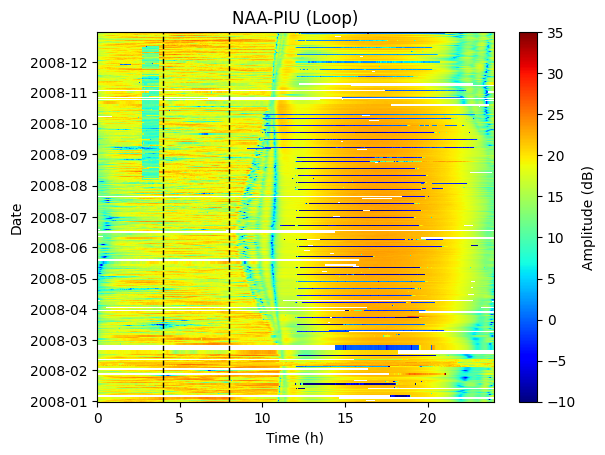

In [53]:
plt.pcolormesh(timeh, piudf1m.index, piudf1m.values, cmap="jet", vmin=-10, vmax=35)
plt.xlabel("Time (h)")
plt.ylabel("Date")
plt.axvline(4,  ls="--", color="black", lw=1)
plt.axvline(8,  ls="--", color="black", lw=1)
plt.colorbar(label="Amplitude (dB)")

plt.title("NAA-PIU (Loop)")



In [46]:
timeh

array([0.00000000e+00, 1.66782488e-02, 3.33564976e-02, ...,
       2.39666435e+01, 2.39833218e+01, 2.40000000e+01], shape=(1440,))

In [54]:
date_ = dt.datetime.strptime(header["DATE-OBS"], '%Y-%m-%d')

In [48]:
header["DATE-OBS"]

'2008-07-06'

In [52]:
date_ = dt.datetime.strptime(header["DATE-OBS"], '%Y-%m-%d')

In [63]:
df.head()

,Time-UT (s),GPS Delay (us),NAA-V Phase (deg.),NAA-V Amp (dB),NDK-V Phase (deg.),NDK-V Amp (dB),NAA-L Phase (deg.),NAA-L Amp (dB),NDK-L Phase (deg.),NDK-L Amp (dB),NAU Phase (deg.),NAU Amp (dB),NLK Phase (deg.),NLK Amp (dB),NPM Phase (deg.),NPM Amp (dB)
0,0.0,-0.01,-81.500000,27.680000,-90.389999,20.270000,-93.150002,12.59,-11.75,5.51,33.959999,11.90,12.310000,-10.15,75.820000,-38.119999
1,1.0,-0.01,-83.279999,27.680000,-88.220001,20.450001,-93.589996,12.57,-12.48,5.53,33.150002,11.95,13.220000,-9.95,79.809998,-38.840000
2,2.0,-0.07,-82.459999,27.730000,-91.699997,20.299999,-94.120003,12.56,-12.79,5.58,34.009998,11.92,21.730000,-10.94,83.919998,-38.290001
3,3.0,0.01,-83.029999,27.620001,-89.059998,20.580000,-94.089996,12.61,-13.25,5.51,33.740002,11.96,21.790001,-10.75,86.980003,-38.200001
4,4.0,0.01,-81.730003,27.750000,-89.809998,20.530001,-93.989998,12.60,-12.81,5.54,34.099998,11.94,14.450000,-11.59,92.110001,-38.360001


## PLO

In [24]:
plodf = pd.DataFrame()

In [27]:

files = os.listdir(source_plo)
N = len(files)
for k, f in enumerate(files):
    with fits.open(source_plo+f) as hdul:
        data = hdul[0].data
        header = hdul[0].header
    try:
        col_labels = [header[x] for x in header if "COL-" in x]
        df = pd.DataFrame(data, columns=col_labels)#.set_index('Time-UT (s)')
        date_ = dt.datetime.strptime(header["DATE-OBS"], '%Y-%m-%d')
        print(f"{date_.date()} : progress {k*100/N:2.2f}", end="\r")
        df["DateTime"] = [date_ + dt.timedelta(seconds=tt) for tt in df["Time-UT (s)"]]
        
        plodf = pd.concat((plodf,df))
    except Exception as e:
        print(f"--> Error in file: {f}\n{e}")

--> Error in file: PLO-20080613_e.fits.gz
time data '0806-13-_e' does not match format '%Y-%m-%d'
--> Error in file: PLO-20080616_e.fits.gz
time data '0806-16-_e' does not match format '%Y-%m-%d'
--> Error in file: PLO-20080619_e.fits.gz
time data '0806-19-_e' does not match format '%Y-%m-%d'
--> Error in file: PLO-20080614_e.fits.gz
time data '0806-14-_e' does not match format '%Y-%m-%d'
--> Error in file: PLO-20080702_e.fits.gz
time data '0807-02-_e' does not match format '%Y-%m-%d'
--> Error in file: PLO-20080615_e.fits.gz
time data '0806-15-_e' does not match format '%Y-%m-%d'
--> Error in file: PLO-20080701_e.fits.gz
time data '0807-01-_e' does not match format '%Y-%m-%d'
--> Error in file: PLO-20080703_e.fits.gz
time data '0807-03-_e' does not match format '%Y-%m-%d'
--> Error in file: PLO-20080620_e.fits.gz
Shape of passed values is (24153, 16), indices imply (24153, 12)
--> Error in file: PLO-20080704_e.fits.gz
time data '0807-04-_e' does not match format '%Y-%m-%d'
--> Error i

In [26]:
header

SIMPLE  =                    T / Written by IDL:   4-Jul-2008 11:12:29.00       
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                   12 /                                                
NAXIS2  =                86400 /                                                
DATE    = '04/07/08'           / Creation date (DD/MM/YY) of FITS header        
DATE-OBS= '0806-13-_e'         /                                                
STATION = 'puntalobos'         /                                                
COL-1   = 'Time-UT (s)'        /                                                
COL-2   = 'GPS Delay (us)'     /                                                
COL-3   = 'NAA-L Phase (deg.)' /                                                
COL-4   = 'NAA-L Amp (dB)'     /                                                
COL-5   = 'NAU Phase (deg.)'

In [28]:
plodf = plodf.set_index("DateTime")
plodf = plodf.sort_index()
plodf.head()

,Time-UT (s),GPS Delay (us),NAA-V Phase (deg.),NAA-V Amp (dB),NWC Phase (deg.),NWC Amp (dB),NAA-L Phase (deg.),NAA-L Amp (dB),NAU Phase (deg.),NAU Amp (dB),NDK Phase (deg.),NDK Amp (dB),NPM Phase (deg.),NPM Amp (dB),NLK Phase (deg.),NLK Amp (dB)
DateTime,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,0.0,-0.01,112.180000,25.719999,154.869995,6.92,100.290001,26.190001,-168.619995,26.930000,114.379997,20.200001,-116.839996,23.070000,-108.790001,5.92
2008-01-01 00:00:01,1.0,-0.01,111.669998,25.610001,153.600006,7.75,100.279999,26.100000,-168.699997,26.920000,116.139999,20.049999,-118.930000,23.030001,-108.059998,3.90
2008-01-01 00:00:02,2.0,0.01,111.019997,25.469999,150.039993,13.24,100.180000,26.139999,-168.750000,26.930000,116.290001,20.290001,-118.400002,23.010000,-104.290001,8.61
2008-01-01 00:00:03,3.0,0.03,112.440002,25.530001,148.639999,8.00,99.839996,26.000000,-168.110001,26.930000,116.449997,20.330000,-119.070000,23.010000,-106.139999,6.03
2008-01-01 00:00:04,4.0,-0.01,111.750000,25.570000,137.259995,-1.18,99.620003,26.049999,-168.309998,26.940001,116.699997,20.280001,-119.000000,23.049999,-108.019997,2.40


In [12]:
gc.collect()

2038

In [55]:
df1m = plodf.resample('1T').mean()
df1m['date'] = df1m.index.date
df1m['time'] = df1m.index.time

Tx = "NAA-L Amp (dB)"
plodf1m = df1m.pivot_table(index='date', columns='time', values=Tx)

timeh = np.linspace(0,24,piudf1m.shape[1])

/tmp/ipykernel_1090034/946129151.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df1m = plodf.resample('1T').mean()


Text(0.5, 1.0, 'NAA-PLO (Loop)')

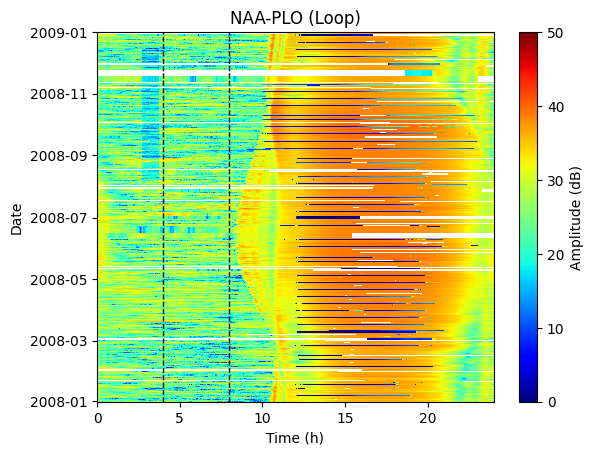

In [57]:
plt.pcolormesh(timeh, plodf1m.index, plodf1m.values, cmap="jet", vmin=-0, vmax=50)
plt.xlabel("Time (h)")
plt.ylabel("Date")
plt.axvline(4,  ls="--", color="black", lw=1)
plt.axvline(8,  ls="--", color="black", lw=1)

plt.colorbar(label="Amplitude (dB)")
plt.title("NAA-PLO (Loop)")